## Project 2: The Tacoma Bridge

In [1]:
# All the modules needed for this project
import numpy as np  
import numpy.random as random  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json
import copy
import random
import math

%matplotlib inline

In [2]:
tstart=0 # Start time of the simulation(s)
tend=100 # End time of the simulation(s)

d=0.01 #damping coefficent
a=1 #force parameter
M=2500 #mass
K=10000 #spring constant 
l=6 #length

In [3]:
def tacoma(dt=0.01, cromer=False, y0=0, z0=0, theta0=0.01, gamma0=0):

    # Create the variables to store the results
    times=np.arange(tstart, tend+dt, dt)  # Create the array of model times
    Nt=len(times)                         # Number of time-steps
    y=np.zeros(Nt)                   
    theta=np.zeros(Nt)                   
    z=np.zeros(Nt) 
    gamma=np.zeros(Nt) 

    # Set the initial conditions
    y[0]= y0
    z[0] = z0
    theta[0] = theta0
    gamma[0] = gamma0

    # Loop over all of the times and integrate the model
    for n in range(Nt-1):
        z[n + 1] = z[n] + dt * (-d * z[n] - (K / (M * a)) * (np.exp(a * (y[n] - l * np.sin(theta[n]))) +
                                                              np.exp(a * (y[n] + l * np.sin(theta[n]))) - 2))
        gamma[n + 1] = gamma[n] + dt * (-d * gamma[n] + (3 * np.cos(theta[n]) / l) *
                                        (K / (M * a)) * (np.exp(a * (y[n] - l * np.sin(theta[n]))) -
                                                        np.exp(a * (y[n] + l * np.sin(theta[n])))))
        # Time-step the angle/vertical displacement. If we are using 'Taylor' or 'Cromer"
        if cromer:
            y[n+1] = y[n] + dt * (z[n+1])
            theta[n + 1] = theta[n] + dt * (gamma[n + 1])
        else:
            y[n+1] = y[n] + dt * (z[n])
            theta[n + 1] = theta[n] +  dt * (gamma[n])
   
        
    return times, theta, y

Text(0, 0.5, '$\\theta$ (radians)')

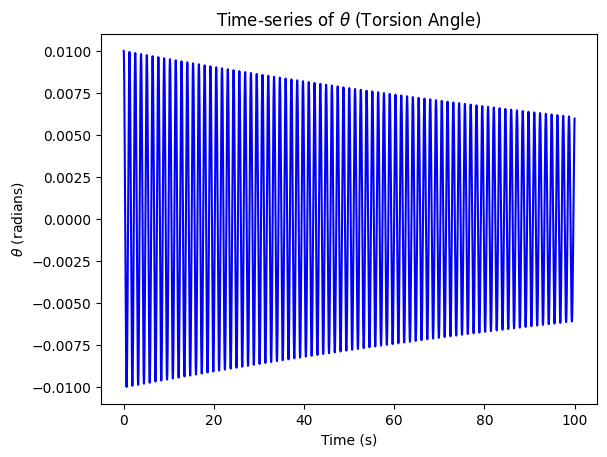

In [4]:
# Run model with Cromer = True
times_cromer, theta_cromer, y_cromer = tacoma(dt=0.01, cromer=True)

plt.plot(times_cromer, theta_cromer, color='blue')
plt.title('Time-series of $\\theta$ (Torsion Angle)')
plt.xlabel('Time (s)')
plt.ylabel('$\\theta$ (radians)')

Text(0, 0.5, '$y$ (meters)')

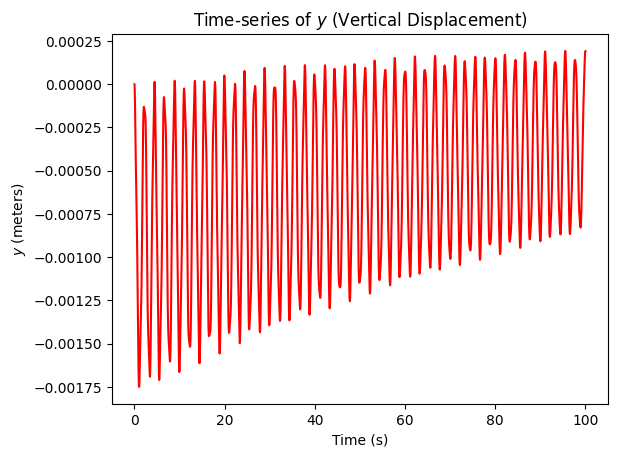

In [5]:
# Plot time-series of y (Vertical Displacement)
plt.plot(times_cromer, y_cromer, color='red')
plt.title('Time-series of $y$ (Vertical Displacement)')
plt.xlabel('Time (s)')
plt.ylabel('$y$ (meters)')

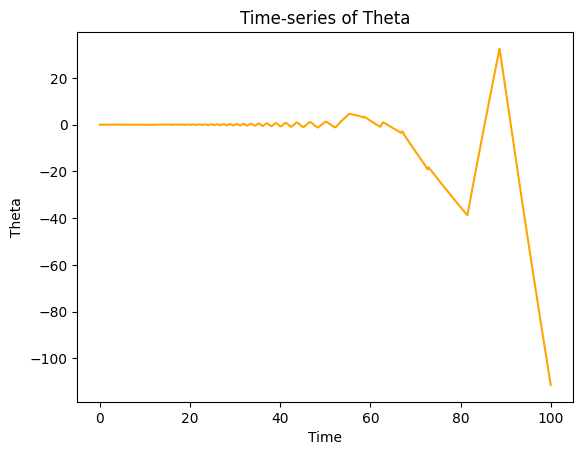

In [6]:
# Run the model with Cromer = False
times_taylor, theta_taylor, y_taylor = tacoma(dt=0.01,cromer=False)
# Theta time-series plot

plt.plot(times_taylor, theta_taylor,color='orange', label='Theta (Cromer=False)')
plt.title('Time-series of Theta')
plt.xlabel('Time')
plt.ylabel('Theta')

plt.show()

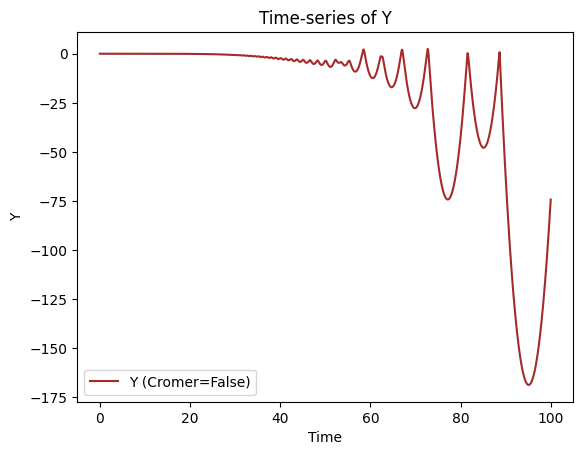

In [7]:
# Y time-series plot
plt.plot(times_taylor, y_taylor,color='brown', label='Y (Cromer=False)')
plt.title('Time-series of Y')
plt.xlabel('Time')
plt.ylabel('Y')
plt.legend()
plt.show()

In [8]:
def tacoma_with_wind(dt=0.01, cromer=False, y0=0, z0=0, theta0=0.01, gamma0=0, A=1, omega=3):

    # Create the variables to store the results
    times = np.arange(tstart, tend + dt, dt)
    Nt = len(times)
    y = np.zeros(Nt)
    theta = np.zeros(Nt)
    z = np.zeros(Nt)
    gamma = np.zeros(Nt)

    # Set the initial conditions
    y[0] = y0
    z[0] = z0
    theta[0] = theta0
    gamma[0] = gamma0

    # Loop over all of the times and integrate the model
    for n in range(Nt - 1):
        # Wind force
        wind_force = A * np.sin(omega * times[n])
        
        # Update velocities
        z[n + 1] = z[n] + dt * (-d * z[n] - (K / M) * y[n] + wind_force)
        gamma[n + 1] = gamma[n] + dt * (-d * gamma[n] - (K / (M * l * l)) * theta[n])

        # Time-step the angle/vertical displacement based on the chosen method
        if cromer:
            y[n + 1] = y[n] + dt * z[n + 1]
            theta[n + 1] = theta[n] + dt * gamma[n + 1]
        else:
            y[n + 1] = y[n] + dt * z[n]
            theta[n + 1] = theta[n] + dt * gamma[n]

    return times, theta, y

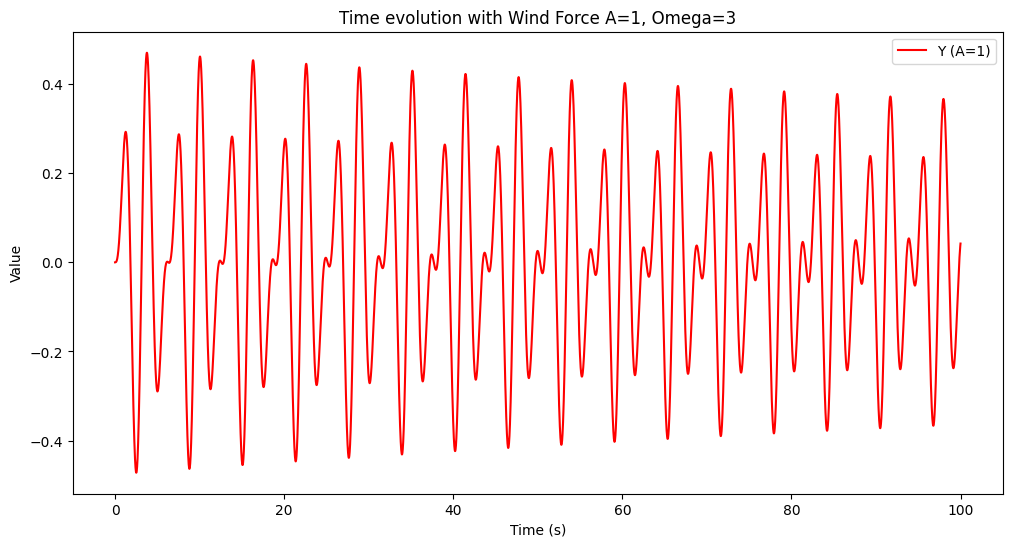

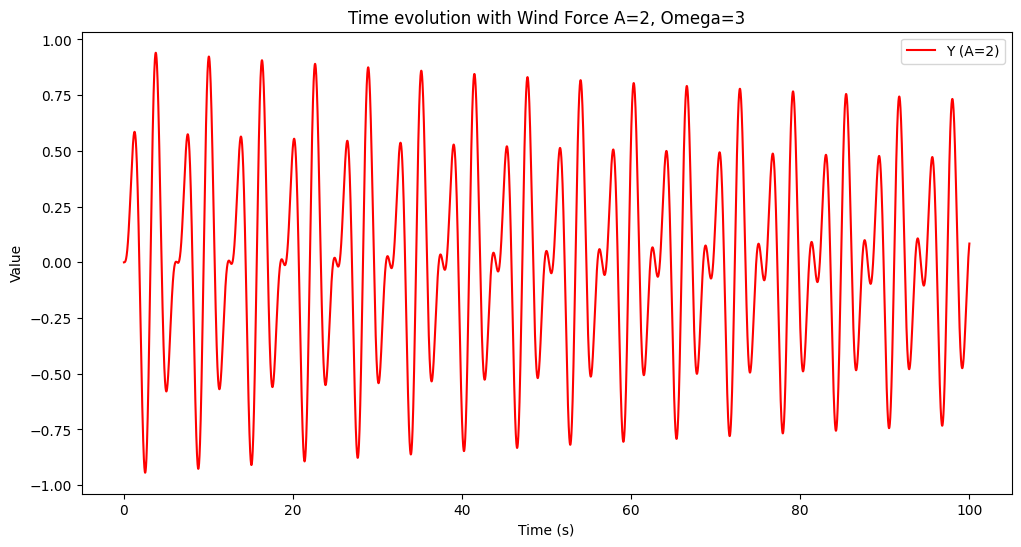

In [9]:
# Simulations for A = 1 and A = 2 with omega = 3
times, theta_A1, y_A1 = tacoma_with_wind(dt=0.01, cromer=True, A=1, omega=3)
_, theta_A2, y_A2 = tacoma_with_wind(dt=0.01, cromer=True, A=2, omega=3)

# Plotting
plt.figure(figsize=(12, 6))

# Plot for A = 1
plt.plot(times, y_A1, label='Y (A=1)', color='red')
plt.title('Time evolution with Wind Force A=1, Omega=3')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()


# Plotting
plt.figure(figsize=(12, 6))
# Plot for A = 2
plt.plot(times, y_A2, label='Y (A=2)', color='red')
plt.title('Time evolution with Wind Force A=2, Omega=3')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()

plt.show()

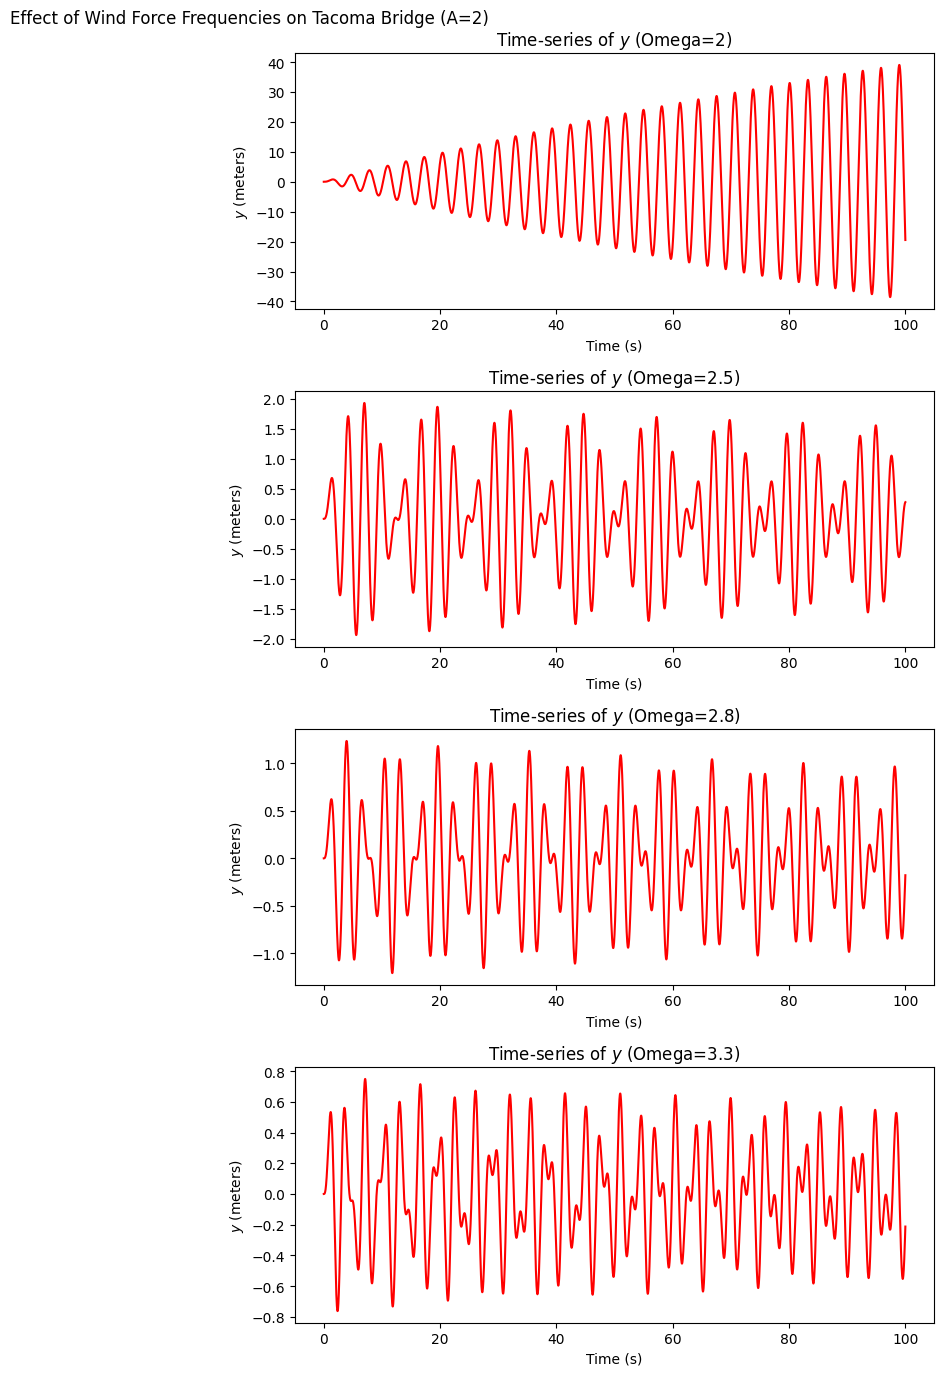

In [10]:
omega_values = [2, 2.5, 2.8, 3.3]

# Prepare plots
plt.figure(figsize=(14, 14))
plt.suptitle('Effect of Wind Force Frequencies on Tacoma Bridge (A=2)')

for i, omega in enumerate(omega_values):
    # Run model for each omega
    times, theta, y = tacoma_with_wind(dt=0.01, cromer=True, A=2, omega=omega)

    plt.subplot(len(omega_values), 2, 2*i+2)
    plt.plot(times, y, label=f'Y (Omega={omega})', color='red')
    plt.title(f'Time-series of $y$ (Omega={omega})')
    plt.xlabel('Time (s)')
    plt.ylabel('$y$ (meters)')
plt.tight_layout()
plt.show()


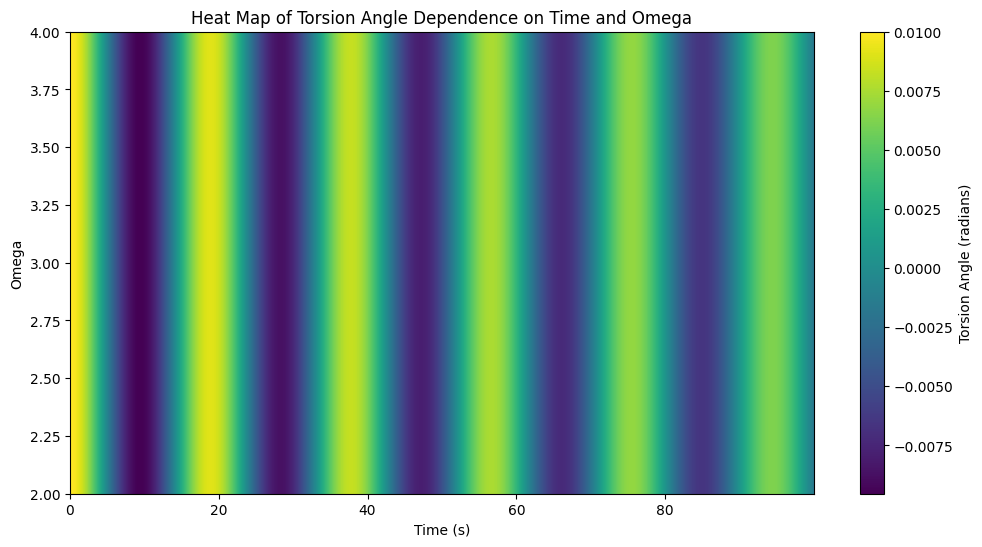

In [11]:
# Set up the range for omega values and time intervals.
omega_values = np.linspace(2, 4, 20)  # 20 values from 2 to 4
times = np.arange(0, 100, 0.01)       # Times from 0 to 100 in steps of 0.01

# Initialize a matrix to hold torsion angle data for each omega and time.
theta_matrix = np.zeros((len(omega_values), len(times)))

# Loop through each omega value using a simple for loop and an index variable.
for i in range(len(omega_values)):
    omega = omega_values[i]

    # The function 'tacoma_with_wind' is assumed to return time, theta (torsion angles), and something else.
    _, theta, _ = tacoma_with_wind(dt=0.01, cromer=True, A=2, omega=omega)
    
    # This assumes that the length of theta matches the number of time steps.
    theta_matrix[i, :] = theta[:len(times)]

# Plotting the heat map.
plt.figure(figsize=(12, 6))
plt.imshow(theta_matrix, aspect='auto', extent=[times[0], times[-1], omega_values[0], omega_values[-1]], 
           cmap='viridis', origin='lower')
plt.colorbar(label='Torsion Angle (radians)')
plt.xlabel('Time (s)')
plt.ylabel('Omega')
plt.title('Heat Map of Torsion Angle Dependence on Time and Omega')
plt.show()


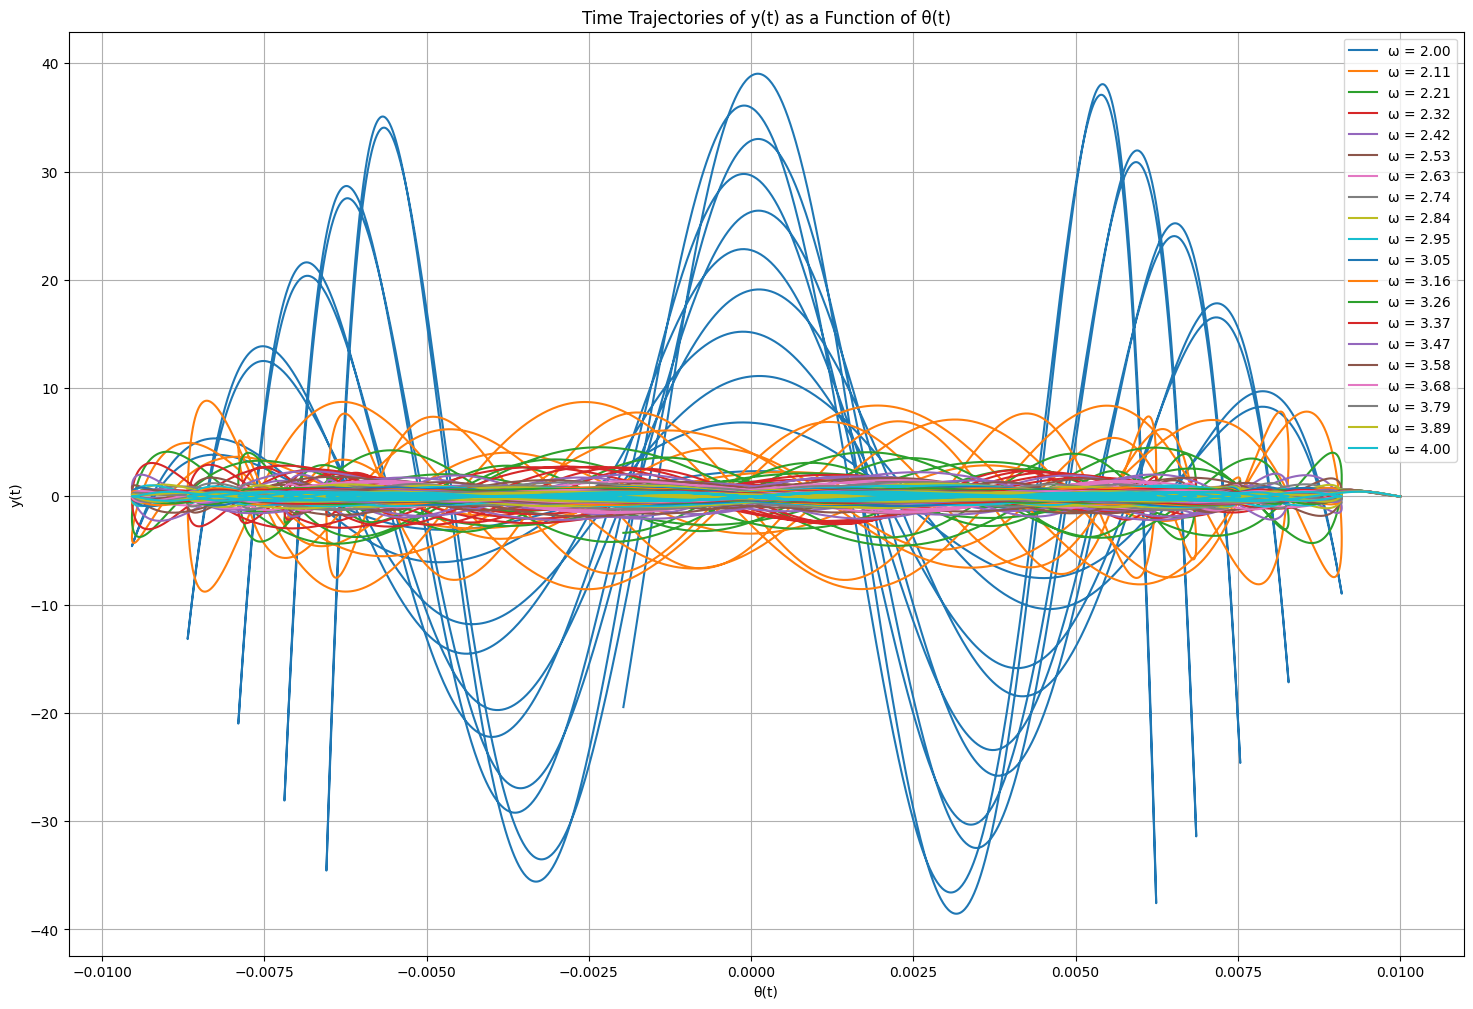

In [12]:

# Run simulations for different omega values
omega_values = np.linspace(2, 4, 20)  # Create 20 values between 2 and 4

# Prepare plots
plt.figure(figsize=(18, 12))

for omega in omega_values:
    # Run the simulation with A=2 and the current omega value
    times, theta, y = tacoma_with_wind(dt=0.01, cromer=True, A=2, omega=omega)
    
    # Plot the results with flipped axes
    plt.plot(theta, y, label=f'ω = {omega:.2f}')

# Add plot details
plt.xlabel('θ(t)')
plt.ylabel('y(t)')
plt.title('Time Trajectories of y(t) as a Function of θ(t)')
plt.legend()
plt.grid(True)
plt.show()